# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

> Again, **don't use ChatGPT for this assignment.** You should be able to memorize the most basic parts of pandas.

## 0) Setup

Import pandas **with the correct name** .

In [47]:
import pandas as pd
import xlrd

## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the name we'll always use for a dataframe.

> **TIP:** You will use `read_excel` instead of `read_csv`. Trying `read_excel` the first time will probably not work, you'll get an error message. Be sure to read the error carefully: *you probably need to install a new library before it will work, and the error tells you what the library is named*. You *might* need to do `Kernel > Restart Kernel...` and run the notebook again from the top in order to get it to work.

In [48]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install --quiet matplotlib

Note: you may need to restart the kernel to use updated packages.


In [50]:
df = pd.read_excel('/Users/isabellerch/Desktop/LEDE/Unterricht/Day6/06-homework 2/richpeople.xlsx', engine='openpyxl')

## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [51]:
# display the number of rows and columns
print("Number of rows and columns:", df.shape)

Number of rows and columns: (1653, 30)


In [52]:
# display the names and data types of each column
print("\nColumn names and data types:")
print(df.info())


Column names and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     1653 non-null   int64  
 1   name                     1653 non-null   object 
 2   rank                     1653 non-null   int64  
 3   citizenship              1653 non-null   object 
 4   countrycode              1653 non-null   object 
 5   networthusbillion        1653 non-null   float64
 6   selfmade                 1651 non-null   object 
 7   typeofwealth             1651 non-null   object 
 8   gender                   1653 non-null   object 
 9   age                      1590 non-null   float64
 10  industry                 1652 non-null   object 
 11  IndustryAggregates       1652 non-null   object 
 12  region                   1653 non-null   object 
 13  north                    1653 non-null   int64  

In [53]:
# or just the head-function
df.head()

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
0,2014,A. Jerrold Perenchio,663,United States,USA,2.6,self-made,executive,male,83.0,...,former chairman and CEO,1955.0,NaN,"television, Univision",represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN
1,2014,Abdulla Al Futtaim,687,United Arab Emirates,ARE,2.5,inherited,inherited,male,NaN,...,relation,1930.0,NaN,"auto dealers, investments",company split between him and cousin in 2000,NaN,http://en.wikipedia.org/wiki/Al-Futtaim_Group,http://www.al-futtaim.ae/content/groupProfile.asp,NaN,NaN
2,2014,Abdulla bin Ahmad Al Ghurair,305,United Arab Emirates,ARE,4.8,inherited,inherited,male,NaN,...,relation,1960.0,NaN,diversified,inherited from father,NaN,http://en.wikipedia.org/wiki/Al-Ghurair_Group,http://www.alghurair.com/about-us/our-history,NaN,NaN
3,2014,Abdullah Al Rajhi,731,Saudi Arabia,SAU,2.4,self-made,self-made finance,male,NaN,...,founder,1957.0,NaN,banking,NaN,NaN,http://en.wikipedia.org/wiki/Al-Rajhi_Bank,http://www.alrajhibank.com.sa/ar/investor-rela...,http://www.alrajhibank.com.sa/ar/about-us/page...,NaN
4,2014,Abdulsamad Rabiu,1372,Nigeria,NGA,1.2,self-made,founder non-finance,male,54.0,...,founder,1988.0,NaN,"sugar, flour, cement",NaN,NaN,http://www.forbes.com/profile/abdulsamad-rabiu/,http://www.bloomberg.com/research/stocks/priva...,NaN,NaN


## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [54]:
# get the 10 richest billionaires
df_top_10_richest = df.sort_values(by='networthusbillion', ascending=False).head(10)

# select only the name and networthusbillion columns
df_top_10_richest = df_top_10_richest[['name', 'networthusbillion']]

# Show the new dataframe
df_top_10_richest

,name,networthusbillion
184,Bill Gates,76.0
226,Carlos Slim Helu,72.0
79,Amancio Ortega,64.0
1562,Warren Buffett,58.2
862,Larry Ellison,48.0
339,David Koch,40.0
247,Charles Koch,40.0
1364,Sheldon Adelson,38.0
280,Christy Walton,36.7
724,Jim Walton,34.7


## 4a) How many male billionaires are there compared to the number of female billionares?

> **TIP:** This is not a `.groupby`

In [55]:
# get the number of male billionaires:
male_billionaires = df[df['gender'] == 'male'].shape[0]
print(male_billionaires)

1473


In [56]:
# get the number of female billionaires:
female_billionaires = df[df['gender'] == 'female'].shape[0]
print(female_billionaires)

180


In [57]:
# write out the result in a pretty neat sentence:
print("In total, there are", male_billionaires,"male billionaires and only", female_billionaires,"female billionaires.")

In total, there are 1473 male billionaires and only 180 female billionaires.


## 4b) What percent is that?

> **TIP:** Doing percentages with the answer to `4a` is so common that there's an extra parameter to automatically calculate it. Look at the documentation!

In [58]:
df['gender'].value_counts(normalize=True) * 100

male      89.110708
female    10.889292
Name: gender, dtype: float64

## 4c) Is the average wealth different for a female billionaire as compared to a male billionaire?

> **TIP:** This one *does* use `.groupby`. You can pick what 'average' means in this context.

In [59]:
# filter df by gender
male_billionaires = df[df['gender'] == 'male']
female_billionaires = df[df['gender'] == 'female']

In [60]:
# calculate the average net worth for male billionaires
average_wealth_male = male_billionaires['networthusbillion'].mean()
print(f"Average wealth of male billionaires: {average_wealth_male} billion USD")

Average wealth of male billionaires: 3.9027155465037335 billion USD


In [61]:
# calculate the average net worth for female billionaires
average_wealth_female = female_billionaires['networthusbillion'].mean()
print(f"Average wealth of female billionaires: {average_wealth_female} billion USD")

Average wealth of female billionaires: 3.9205555555555547 billion USD


In [62]:
# compare the averages
if average_wealth_male > average_wealth_female:
    print("Male billionaires have a higher average wealth.")
elif average_wealth_male < average_wealth_female:
    print("Female billionaires have a higher average wealth.")
else:
    print("Male and female billionaires have the same average wealth.")

Female billionaires have a higher average wealth.


## 5a) What is the most common source/type of wealth?

In [63]:
## SOURCE OF WEALTH: ###

# check the columns first to see the source/type of wealth:
df.columns # so it is the "sourceofwealth" column

Index(['year', 'name', 'rank', 'citizenship', 'countrycode',
       'networthusbillion', 'selfmade', 'typeofwealth', 'gender', 'age',
       'industry', 'IndustryAggregates', 'region', 'north',
       'politicalconnection', 'founder', 'generationofinheritance', 'sector',
       'company', 'companytype', 'relationshiptocompany', 'foundingdate',
       'gdpcurrentus', 'sourceofwealth', 'notes', 'notes2', 'source',
       'source_2', 'source_3', 'source_4'],
      dtype='object')

In [64]:
# check the number of differentt occurences in the "sourceofwealth"-column
source_of_wealth_value_counts = df['sourceofwealth'].value_counts()

# get the source of wealth with the maximum count
max_value = source_of_wealth_value_counts.idxmax()

# print a nice sentence with the answer:
print(f"The most common source of wealth is {max_value}.")

The most common source of wealth is real estate.


In [65]:
### TYPE OF WEALTH: ####

# check the number of differentt occurences in the "typeofwealth"-column
type_of_wealth_value_counts = df['typeofwealth'].value_counts()

# get the type of wealth with the maximum count
max_value = type_of_wealth_value_counts .idxmax()

# print a nice sentence with the answer:
print(f"The most common type of wealth is {max_value}.")

The most common type of wealth is inherited.


## 5b) Is the most common source/type of wealth different between men and women?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together??? You could also do this as two separate cells where you calculate it separately for men and women.
>
> **TIP:** Use percentages for this, it makes it a lot more readable.

In [66]:
## SOURCE OF WEALTH ###

# first the most common source of wealth with men 

most_common_source_of_wealth_for_men = df[df["gender"] == "male"]['sourceofwealth'].value_counts().idxmax()
print(f"The most common source of wealth for men is {most_common_source_of_wealth_for_men}.")

The most common source of wealth for men is real estate.


In [67]:
# first the most common source of wealth - now for women

most_common_source_of_wealth_for_women = df[df["gender"] == "female"]['sourceofwealth'].value_counts().idxmax()
print(f"The most common source of wealth for women is {most_common_source_of_wealth_for_women}.")

The most common source of wealth for women is diversified.


In [68]:
# Another way: The groupby method
df.groupby('gender')['sourceofwealth'].value_counts(normalize=True) * 100

gender  sourceofwealth
female  diversified       5.232558
        real estate       4.069767
        media             3.488372
        construction      2.906977
        consumer goods    2.906977
                            ...   
male    web hosting       0.068353
        wind turbines     0.068353
        wine              0.068353
        winter jackets    0.068353
        wrestling         0.068353
Name: sourceofwealth, Length: 677, dtype: float64

In [69]:
## TYPE OF WEALTH ###

# first the most common type of wealth with men 

most_common_type_of_wealth_for_men = df[df["gender"] == "male"]['typeofwealth'].value_counts().idxmax()
print(f"The most common type of wealth for men is {most_common_type_of_wealth_for_men}.")

The most common type of wealth for men is founder non-finance.


In [70]:
## SOURCE OF WEALTH ###

# first the most common source of wealth with women 

most_common_source_of_wealth_for_women = df[df["gender"] == "male"]['sourceofwealth'].value_counts().idxmax()
print(f"The most common source of wealth for women is {most_common_source_of_wealth_for_women}.")

The most common source of wealth for women is real estate.


In [71]:
# Another way: The groupby method
df.groupby('gender')['typeofwealth'].value_counts(normalize=True) * 100

gender  typeofwealth            
female  inherited                   78.888889
        founder non-finance         11.666667
        executive                    3.333333
        self-made finance            3.333333
        privatized and resources     2.777778
male    founder non-finance         30.319511
        inherited                   24.745071
        self-made finance           22.977566
        privatized and resources    12.712441
        executive                    9.245411
Name: typeofwealth, dtype: float64

## 6a) What companies have the most billionaires? Let's see the top five.

> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like you should use `groupby`, but don't! There's an easier way to count.

In [72]:
# filter out the companies
df_companies = df['company'].value_counts(ascending=False)

# turn this series into a real dataframe
#df_companies = pd.DataFrame(df_companies) 

# check out the top five companies
df_companies.head(5)

Hyatt                  11
Oetker-Gruppe           8
S. C. Johnson & Son     7
Alfa Group              6
Votorantim Group        6
Name: company, dtype: int64

### 6b) Graph those top 5 as a horizontal bar graph. Make the largest bar be at the top of the graph.

> **TIP:** Just try to throw `.plot()` on the end??
> 
> **TIP:** Make the largest bar be at the top of the graph
>
> **TIP:** If your chart seems... weird, think about where in the process you're sorting vs using `head`

In [77]:
# import matplotlib
import matplotlib

<AxesSubplot:>

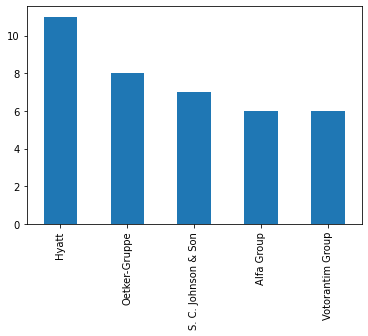

In [80]:
# exact only the op first five companies
top_five_companies = df_companies.nlargest(5)
# plot a bar chart (couldnt make the horizontal...)
top_five_companies.plot(kind='bar')

## 7) How much money do these top 5 billionaires have in total?

> **TIP:** for multiple conditions, you can't use `or` and `and`. In pandas, `|` means *or* and `&` means *and*.
>
> **TIP:** Checking multiple conditions can be done two ways.
> - `(df.colname == 'A') | (df.colname == 'B')`
> - `df.colname.isin(['A', 'B'])`

In [92]:
# make a new df for top 5 billionaires
top_5_billionaires = df.nlargest(5, 'networthusbillion')

# sum up the networthbillion column
total_networth = top_5_billionaires['networthusbillion'].sum()

# # print out the answer
print(f'The top 5 billionaires have a total of {total_networth} billion US-Dollar of networth.')

The top 5 billionaires have a total of 318.2 billion US-Dollar of networth.


## 8) What are the top 10 countries with the most money held by billionaires?

I am **not** asking which country has the most billionaires - this is **total amount of money per country.**

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," "I want to add it all up," and "I want 10 of them." Just chain it all together.

In [102]:
# # use the groupby method

# Correct the code to group by 'country' and then sum the 'networthbillion'
total_amount_of_money_per_countrycode = df.groupby('countrycode')['networthusbillion'].sum().nlargest(10)

# Print the result
print(total_amount_of_money_per_countrycode)

countrycode
USA    2322.4
RUS     422.5
DEU     401.4
CHN     375.8
FRA     235.3
HKG     213.7
BRA     192.2
IND     191.9
ITA     158.1
GBR     152.0
Name: networthusbillion, dtype: float64


## 9a) How old is an average billionaire?

In [105]:
# get the average of the 'age'-column
average_age = df['age'].mean()

# print out the answer nicely
print(f'The average billionaire is {average_age} years old.')

The average billionaire is 63.34213836477988 years old.


## 9b) How old are self-made billionaires compared to non self-made billionaires? 

In [134]:
# first the SELF-MADE

# get a dataframe with only the selfmade billionaired
df_selfmade = df[df['selfmade'] == 'self-made']

# filter out all NaNs 
df_selfmade_final = df_selfmade.dropna(subset=['age'])

# average age of selfmade billionaires
average_age_selfmade_billionaires = df_selfmade_final['age'].mean()

print(f'The average selfmade billionaire is {average_age_selfmade_billionaires} years old.')

The average selfmade billionaire is 62.62589928057554 years old.


In [139]:
# now the NON-SELF-MADE

# get a dataframe with only the selfmade billionaired
df_non_selfmade = df[df['selfmade'] != 'self-made']

# filter out all NaNs 
df_non_selfmade_final = df_non_selfmade.dropna(subset=['age'])

# average age of selfmade billionaires
average_age_non_selfmade_billionaires = df_non_selfmade_final['age'].mean()

print(f'The average selfmade billionaire is {average_age_non_selfmade_billionaires} years old.')

The average selfmade billionaire is 65.00836820083683 years old.


## 10a) Who are the three youngest billionaires? Who are the three oldest?

In [115]:
# sort the billionaires by age

# first: delete out all billionaires which do have a NaN in their 'age' column
df_billionaires_with_age  = df.dropna(subset=['age'])

# Sort the DataFrame by the 'networthbillion' column in ascending order
sorted_df_billionaires_by_age = df_billionaires_with_age.sort_values(by='age', ascending=True)

# show the three youngest billionaires
sorted_df_billionaires_by_age.head(3) # the three youngest are: Perenna Kei, Dustin Moskovitz and Mark Zuckerberg

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
1172,2014,Perenna Kei,1284,Hong Kong,HKG,1.3,inherited,inherited,female,24.0,...,relation,1996.0,NaN,real estate,inherited from father,NaN,http://en.wikipedia.org/wiki/Perenna_Kei,http://www.loganestate.com/en/about.aspx?ftid=294,NaN,NaN
397,2014,Dustin Moskovitz,202,United States,USA,6.8,self-made,founder non-finance,male,29.0,...,founder,2004.0,NaN,Facebook,NaN,NaN,http://en.wikipedia.org/wiki/Dustin_Moskovitz,http://www.forbes.com/profile/dustin-moskovitz/,https://www.facebook.com/facebook/info?tab=pag...,NaN
1004,2014,Mark Zuckerberg,21,United States,USA,28.5,self-made,founder non-finance,male,29.0,...,founder,2004.0,NaN,Facebook,NaN,NaN,http://www.forbes.com/profile/mark-zuckerberg/,NaN,NaN,NaN


In [116]:
# show the three oldest billionaires
sorted_df_billionaires_by_age.tail(3) # the three odes are Kirk Kerkorian, Karl Wlaschek and David Rockefeller

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
836,2014,Kirk Kerkorian,328,United States,USA,4.5,self-made,self-made finance,male,96.0,...,investor,1924.0,NaN,"casinos, investments",purchased in 1969,NaN,http://en.wikipedia.org/wiki/Kirk_Kerkorian,http://www.forbes.com/profile/kirk-kerkorian/,PROFILE: Las Vegas billionaire amassed his wea...,NaN
816,2014,Karl Wlaschek,305,Austria,AUT,4.8,self-made,founder non-finance,male,96.0,...,founder,1953.0,NaN,retail,NaN,NaN,http://en.wikipedia.org/wiki/BILLA,http://en.wikipedia.org/wiki/Karl_Wlaschek,https://www.billa.at/Footer_Nav_Seiten/Geschic...,NaN
343,2014,"David Rockefeller, Sr.",580,United States,USA,2.9,inherited,inherited,male,98.0,...,relation,1870.0,NaN,"oil, banking",family made most of fortune in the late 19th a...,NaN,http://en.wikipedia.org/wiki/David_Rockefeller,http://en.wikipedia.org/wiki/Standard_Oil,http://en.wikipedia.org/wiki/Rockefeller_family,NaN


## 10b) Make a graph of the distribution of ages.

> **TIP:** You use `.plot()` to graph values in a column independently, but `.hist()` to draw a [histogram](https://www.mathsisfun.com/data/histograms.html) of the distribution of their values

<AxesSubplot:>

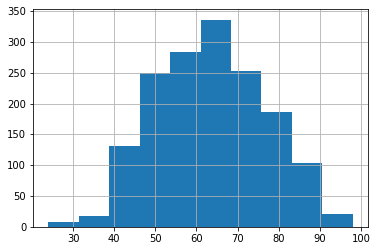

In [119]:
# take the new dataframe where only billionaires are included which have a value in the "age" column
sorted_df_billionaires_by_age['age'].hist()

## 11) Make a scatterplot of net worth compared to age

It's more fun to do this in Altair as compared to matplotlib, but either is fine.

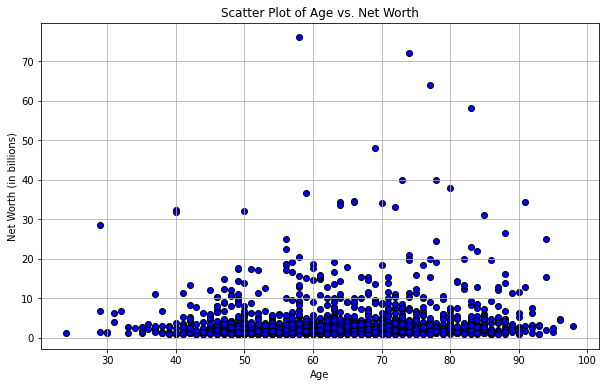

In [143]:
# import matplotlib
import matplotlib.pyplot as plt

# make a scatterplot

# Create a scatter plot with age and net worth
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['networthusbillion'], color='blue', edgecolors='black')

# Add titles and labels
plt.title('Scatter Plot of Age vs. Net Worth')
plt.xlabel('Age')
plt.ylabel('Net Worth (in billions)')

# Optionally, add grid lines for better readability
plt.grid(True)

# Show the plot
plt.show()

## 13) Make a bar graph of the wealth of the top 10 richest billionaires

> **TIP:** When you make your plot, you'll need to set the `x` and `y` or else your chart will look _crazy_
>
> **TIP:** x and y might be the opposite of what you expect them to be

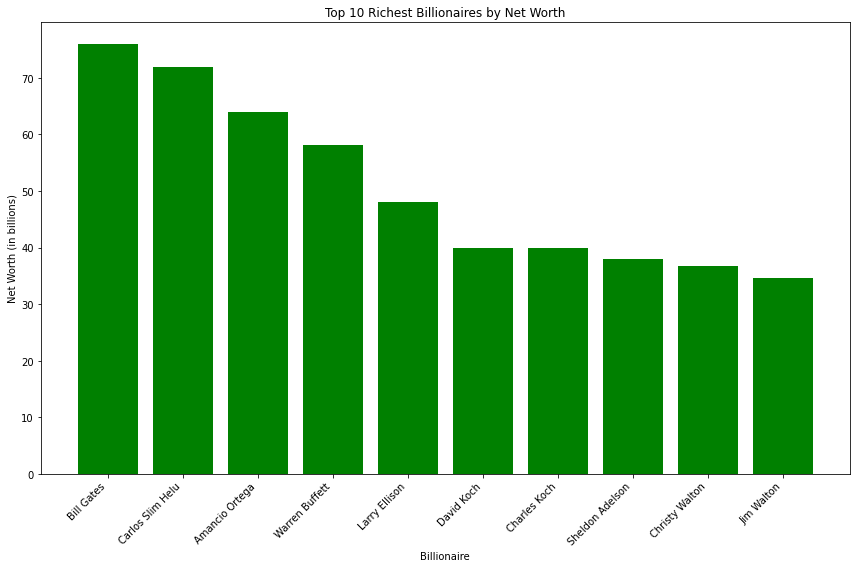

In [154]:
# filter out the dataframe to only get the top 10
df_top_10 = df.sort_values(by='networthusbillion', ascending=False).head(10)

# create a bar graph
plt.figure(figsize=(12, 8))
plt.bar(df_top_10['name'], df_top_10['networthusbillion'], color='green')

# add titles and labels
plt.title('Top 10 Richest Billionaires by Net Worth')
plt.xlabel('Billionaire')
plt.ylabel('Net Worth (in billions)')

# rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# show the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

## 14) Read in the most recent data

I copied and pasted the most recent data from [the original Bloomberg story](https://www.bloomberg.com/billionaires/) (it's in the page's source code), but it all was saved as JSON. Can you use pandas to read in `billionaires.json`?

> **TIP:** If `pd.read_csv` reads a CSV and `pd.read_excel` reads an excel file... what reads in JSON?
>
> **TIP:** It's a lot less complicated than what we did in class.

In [158]:
# read in the data
json_url = '/Users/isabellerch/Downloads/06-homework 2/billionaires.json'

# read in the data and create the dataframe called "billionaires"
billionaires = pd.read_json(json_url)

# show the dataframe
billionaires.head()

,commonName,commonLastName,citizenship,slug,industry,personId,rank,worth,lastChange,lastPercentChange,ytdChange,ytdPercentChange,sector,fWorth,fLastChange,fYtdChange,fLastPercentChange,fYtdPercentChange
0,Elon Musk,Musk,United States,elon-r-musk,Technology,1954518,1,221116780866,9795811154,4.64,84106712938,61.39,Technology,$221B,+$9.80B,+$84.1B,+4.6%,+61.4%
1,Bernard Arnault,Arnault,France,bernard-j-arnault,Consumer,1392853,2,170267873036,7356040557,4.52,8178459368,5.05,Consumer,$170B,+$7.36B,+$8.18B,+4.5%,+5.0%
2,Jeff Bezos,Bezos,United States,jeffrey-p-bezos,Technology,1642252,3,169556171871,3202661603,1.93,62599942079,58.53,Technology,$170B,+$3.20B,+$62.6B,+1.9%,+58.5%
3,Bill Gates,Gates,United States,william-h-gates,Technology,1390479,4,131137012631,1103482475,0.85,21900118029,20.05,Technology,$131B,+$1.10B,+$21.9B,+0.8%,+20.1%
4,Larry Ellison,Ellison,United States,lawrence-j-ellison,Technology,1491757,5,129608081535,2286642464,1.80,37780140594,41.14,Technology,$130B,+$2.29B,+$37.8B,+1.8%,+41.1%
